# Supply Chain Data Analysis

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from decimal import Decimal
import os
import plotly.graph_objs as go
import plotly.offline as py

In [10]:
dataset = pd.read_csv('https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/SCMS_Delivery_History_Dataset.csv')

In [15]:
dataset.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [16]:
dataset.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [17]:
dataset = dataset.dropna()
itemCount = dataset['Country'].value_counts().nlargest(10)
print("Top 10 Countries Wise Count")
print(itemCount)

Top 10 Countries Wise Count
Country
South Africa     1364
Nigeria           952
Côte d'Ivoire     827
Uganda            724
Vietnam           661
Haiti             549
Mozambique        506
Zimbabwe          471
Zambia            470
Tanzania          374
Name: count, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<Axes: xlabel='Country', ylabel='count'>

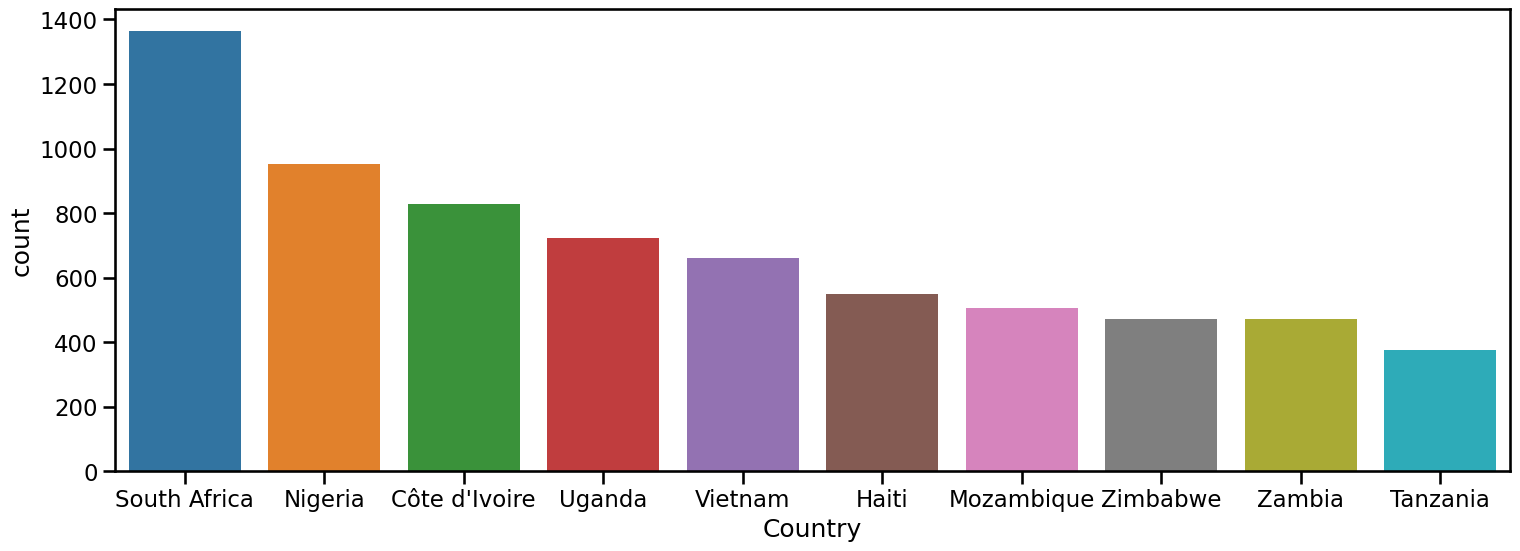

In [26]:
sns.set_context('talk', font_scale = 1)
plt.figure(figsize=(18,6))
sns.countplot(dataset['Country'], order= dataset['Country'].value_counts().nlargest(10).index)

In [30]:
dataset.Country.value_counts()

Country
South Africa          1364
Nigeria                952
Côte d'Ivoire          827
Uganda                 724
Vietnam                661
Haiti                  549
Mozambique             506
Zimbabwe               471
Zambia                 470
Tanzania               374
Rwanda                 336
Congo, DRC             245
Guyana                 162
Ethiopia               127
Burundi                 72
Ghana                   58
Cameroon                54
South Sudan             52
Dominican Republic      37
Namibia                 30
Swaziland               21
Guatemala               15
Benin                   10
Libya                    8
Lebanon                  8
Kenya                    4
Malawi                   4
Afghanistan              3
Angola                   3
Botswana                 3
Togo                     3
Burkina Faso             2
Senegal                  2
Belize                   1
Name: count, dtype: int64

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8158 entries, 21 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            8158 non-null   int64  
 1   Project Code                  8158 non-null   object 
 2   PQ #                          8158 non-null   object 
 3   PO / SO #                     8158 non-null   object 
 4   ASN/DN #                      8158 non-null   object 
 5   Country                       8158 non-null   object 
 6   Managed By                    8158 non-null   object 
 7   Fulfill Via                   8158 non-null   object 
 8   Vendor INCO Term              8158 non-null   object 
 9   Shipment Mode                 8158 non-null   object 
 10  PQ First Sent to Client Date  8158 non-null   object 
 11  PO Sent to Vendor Date        8158 non-null   object 
 12  Scheduled Delivery Date       8158 non-null   object 
 13  Delive

In [35]:
dataset['Delivered to Client Date'] = pd.to_datetime(dataset['Delivered to Client Date'])
dataset['Scheduled Delivery Date'] = pd.to_datetime(dataset['Scheduled Delivery Date'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8158 entries, 21 to 10323
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            8158 non-null   int64         
 1   Project Code                  8158 non-null   object        
 2   PQ #                          8158 non-null   object        
 3   PO / SO #                     8158 non-null   object        
 4   ASN/DN #                      8158 non-null   object        
 5   Country                       8158 non-null   object        
 6   Managed By                    8158 non-null   object        
 7   Fulfill Via                   8158 non-null   object        
 8   Vendor INCO Term              8158 non-null   object        
 9   Shipment Mode                 8158 non-null   object        
 10  PQ First Sent to Client Date  8158 non-null   object        
 11  PO Sent to Vendor Date        815

/var/folders/5x/twsw83z56fq_6jb7cxq50_0w0000gn/T/ipykernel_4287/2320063544.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5x/twsw83z56fq_6jb7cxq50_0w0000gn/T/ipykernel_4287/2320063544.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
dataset['Delivery_Delay'] = (dataset['Delivered to Client Date'] - dataset['Scheduled Delivery Date']).dt.days

/var/folders/5x/twsw83z56fq_6jb7cxq50_0w0000gn/T/ipykernel_4287/196612819.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
dataset['Delivery_Delay']

21        0
22        0
23        0
29        0
32        0
         ..
10319   -16
10320     6
10321    -6
10322   -36
10323   -27
Name: Delivery_Delay, Length: 8158, dtype: int64

In [39]:
dataset.groupby('Country')['Delivery_Delay'].mean().sort_values(ascending = False).reset_index()

,Country,Delivery_Delay
0,"Congo, DRC",15.277551
1,Togo,5.333333
2,Benin,3.700000
3,Senegal,1.500000
4,Botswana,0.666667
5,Afghanistan,0.000000
6,Malawi,0.000000
7,Angola,0.000000
8,Lebanon,0.000000
9,Burkina Faso,0.000000


## Total pack price for top 15 countries using graphs

Total pack price for top 15 countries
 Country
South Africa     23479.74
Vietnam          11015.11
Nigeria          10293.74
Côte d'Ivoire    10174.96
Uganda            9781.99
Mozambique        5782.10
Haiti             5029.42
Tanzania          4727.47
Zambia            3780.12
Rwanda            3721.67
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

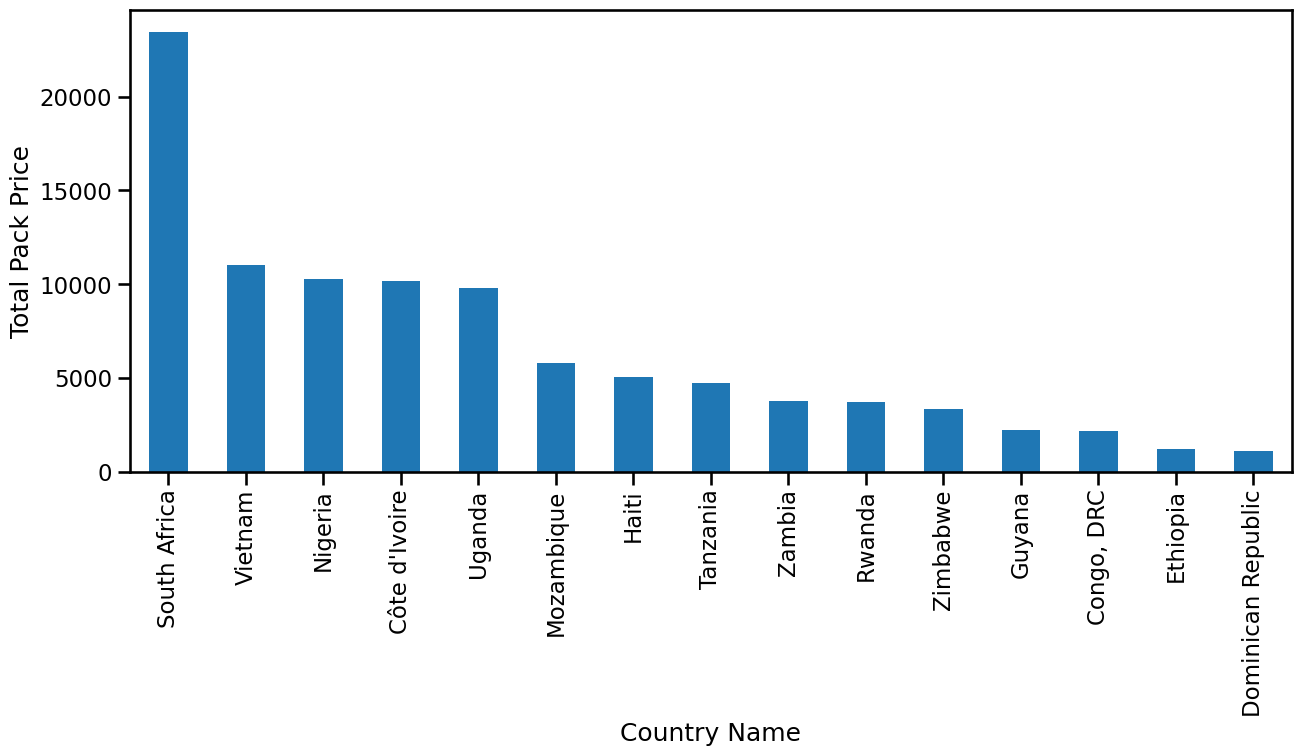

In [40]:
totalPrice = dataset.groupby(['Country'])['Pack Price'].sum().nlargest(10)
print(f"Total pack price for top 15 countries\n {totalPrice}")
plt.figure(figsize=(15,6))
graphData = dataset.groupby(['Country'])['Pack Price'].sum().nlargest(15)
graphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

## First Line Designation Wise Count

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'First Line Designation')

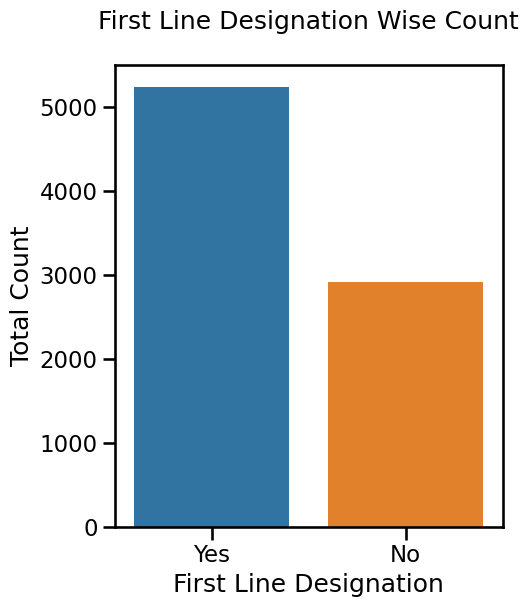

In [46]:
sns.set_context('talk', font_scale = 1)
plt.figure(figsize=(5,6))
sns.countplot(dataset['First Line Designation'], order = dataset['First Line Designation'].value_counts().nlargest(10).index)
plt.title('First Line Designation Wise Count\n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

## Shipment Mode Percantage wise Pie Chart

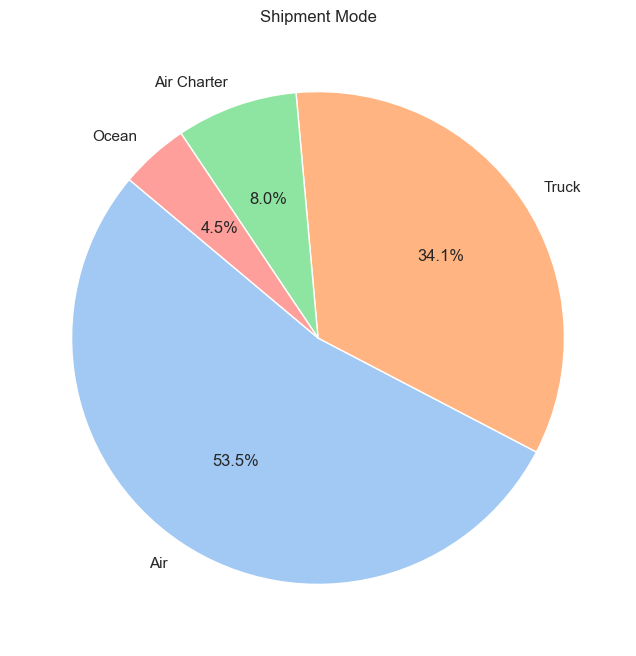

In [55]:
shippingMode = dataset['Shipment Mode'].value_counts()

# Pasta grafiği oluştur
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.set_palette("pastel")
plt.title('Shipment Mode')

plt.pie(shippingMode, labels=shippingMode.index, autopct='%1.1f%%', startangle=140)

plt.show()

## Unique Manufacturing Site Names

In [56]:
uniqueItem = dataset['Manufacturing Site'].unique()
print(f"All unique manufacturing site\n{uniqueItem}")

All unique manufacturing site
['BMS Meymac, France' 'Aurobindo Unit III, India'
 'ABBVIE Ludwigshafen Germany' 'Gilead(Nycomed) Oranienburg DE'
 'Ranbaxy, Paonta Shahib, India' 'Mylan (formerly Matrix) Nashik'
 'Roche Basel' 'GSK Ware (UK)' 'Novartis Pharma AG, Switzerland'
 'BI, Ingelheim, Germany' 'Ipca Dadra/Nagar Haveli IN' 'MSD, Haarlem, NL'
 'Aspen-OSD, Port Elizabeth, SA' 'ABBVIE (Abbott) Logis. UK'
 'Gland Pharma Ltd Pally Factory' 'Cipla, Goa, India'
 'GSK Mississauga (Canada)' 'GSK Aranda' 'Hetero Unit III Hyderabad IN'
 'ABBVIE (Abbott) France' 'Strides, Bangalore, India.'
 'GSK Cape Town Factory (South Africa)' "MSD Midrand, J'burg, SA"
 'Boehringer Ing., Koropi, GR' 'GSK Crawley'
 'Novartis Pharma Suffern, USA' 'Micro Labs Ltd. (Brown & Burk), India'
 'Meditab (for Cipla) Daman IN' 'Medopharm Malur Factory, INDIA'
 'Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway'
 'MSD Manati, Puerto Rico, (USA)'
 'Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC, 

## Shipment Mode, Min and Mean value for Air

In [57]:
itemData = dataset[dataset['Shipment Mode'] == 'Air']
print("The max air shipment mode is: ", itemData['Unit of Measure (Per Pack)'].max())
print("The min air shipment mode is: ", itemData['Unit of Measure (Per Pack)'].min())
itemTypeMean = itemData['Unit of Measure (Per Pack)'].mean()
print("The mean air shipment is: ", round(itemTypeMean,2))

The max air shipment mode is:  1000
The min air shipment mode is:  5
The mean air shipment is:  89.33


## Manufacturing Site Visualization

Manufacturing Site
Aurobindo Unit III, India                                                   2978
Mylan (formerly Matrix) Nashik                                              1407
Hetero Unit III Hyderabad IN                                                 868
Cipla, Goa, India                                                            624
Strides, Bangalore, India.                                                   528
ABBVIE Ludwigshafen Germany                                                  350
ABBVIE (Abbott) Logis. UK                                                    204
BMS Meymac, France                                                           129
Aspen-OSD, Port Elizabeth, SA                                                125
MSD, Haarlem, NL                                                             117
Aurobindo Unit VII, IN                                                       111
Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC, Hinjwadi, Pune, India      56
Janssen-C

Text(0, 0.5, 'Total Count')

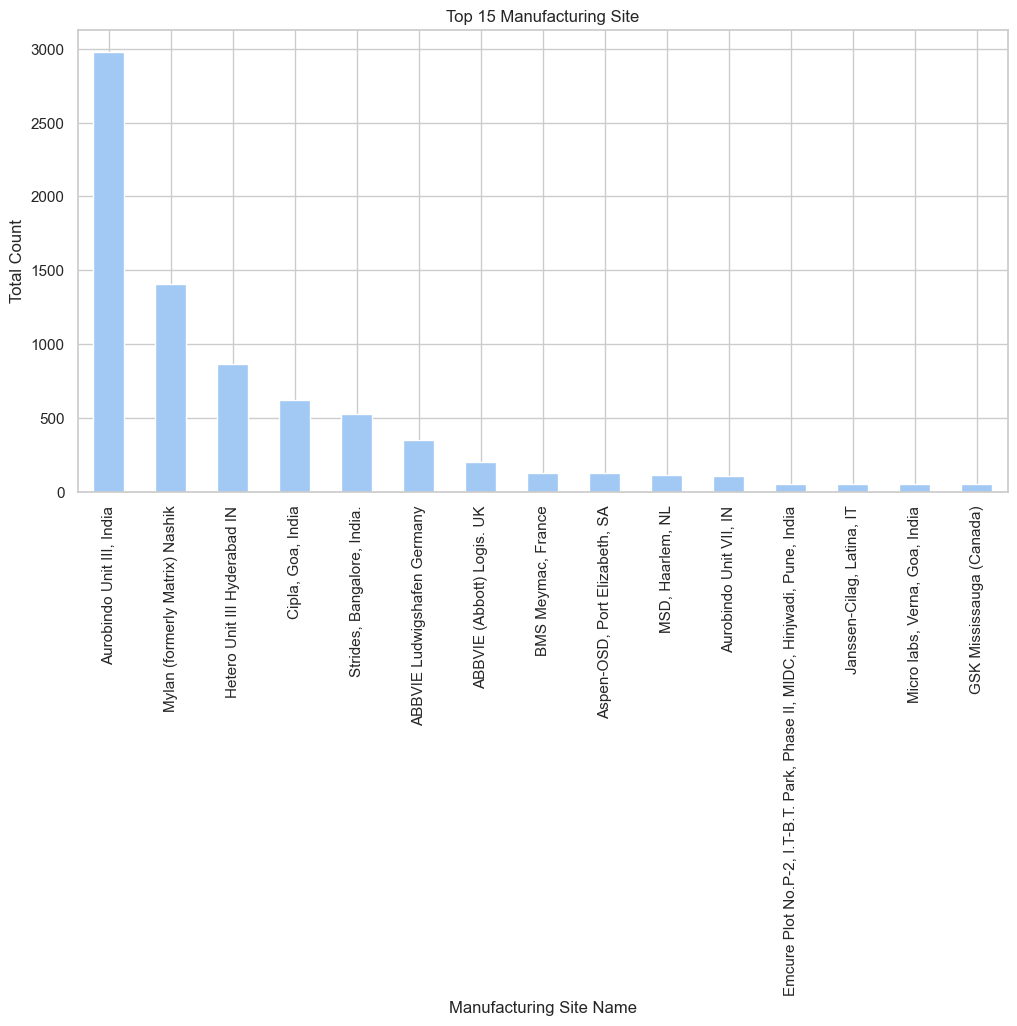

In [62]:
plt.figure(figsize = (12,6))
manufacturingSite = dataset.groupby("Manufacturing Site").size().nlargest(15)
print(manufacturingSite)

manufacturingSite.plot(kind='bar')
plt.title('Top 15 Manufacturing Site')
plt.xlabel('Manufacturing Site Name')
plt.ylabel('Total Count')

## Top 10 Manufacturing Site for Air Shipment Mode

Top 10 Air Manufacturing Site
 Manufacturing Site
Aurobindo Unit III, India         1641
Mylan (formerly Matrix) Nashik     695
Hetero Unit III Hyderabad IN       417
ABBVIE Ludwigshafen Germany        281
Cipla, Goa, India                  264
Strides, Bangalore, India.         251
ABBVIE (Abbott) Logis. UK          147
MSD, Haarlem, NL                    90
BMS Meymac, France                  83
Aspen-OSD, Port Elizabeth, SA       80
Name: count, dtype: int64


Text(0, 0.5, 'Air Count')

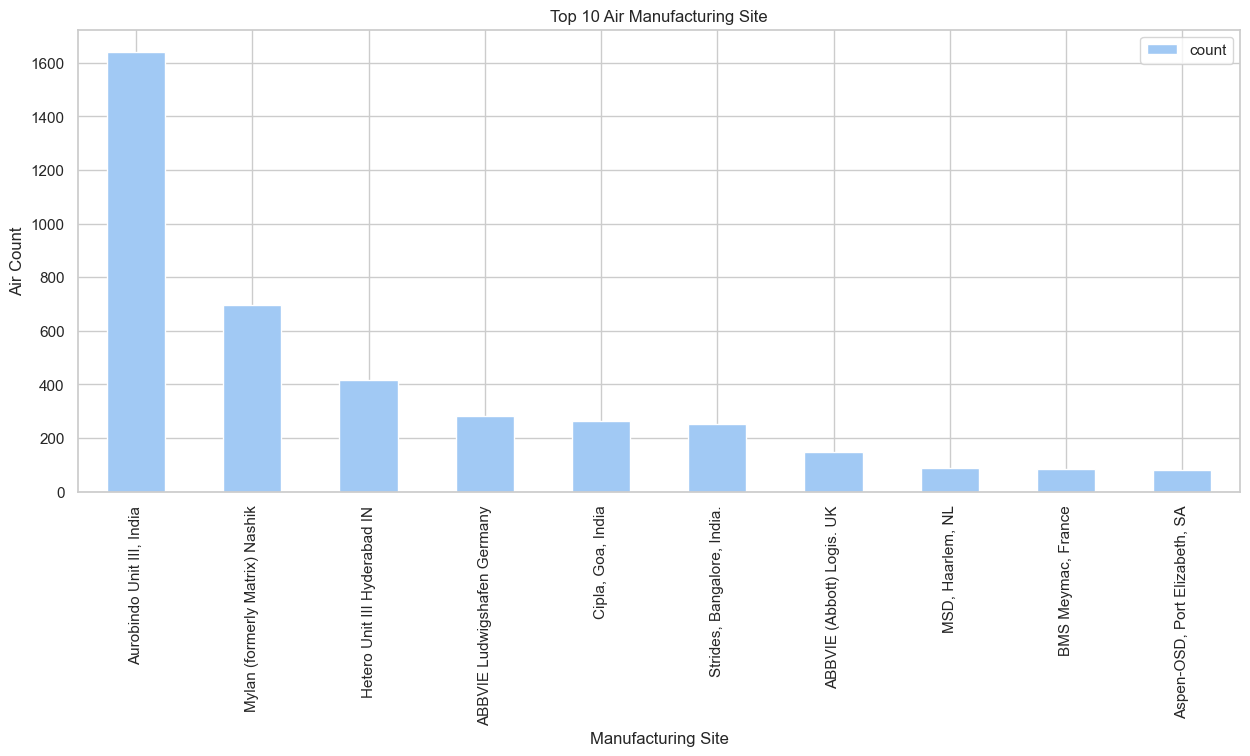

In [61]:
itemData = dataset[dataset['Shipment Mode'] == 'Air']
dataset[dataset['Shipment Mode'] == 'Air']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(15,6))
itemSupplier = dataset[dataset['Shipment Mode'] == 'Air']['Manufacturing Site'].value_counts()[0:10]
print(f"Top 10 Air Manufacturing Site\n {itemSupplier}")
plt.title('Top 10 Air Manufacturing Site')
plt.xlabel('Manufacturing Site')
plt.ylabel('Air Count')

## Shipment Mode and Pack Price

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



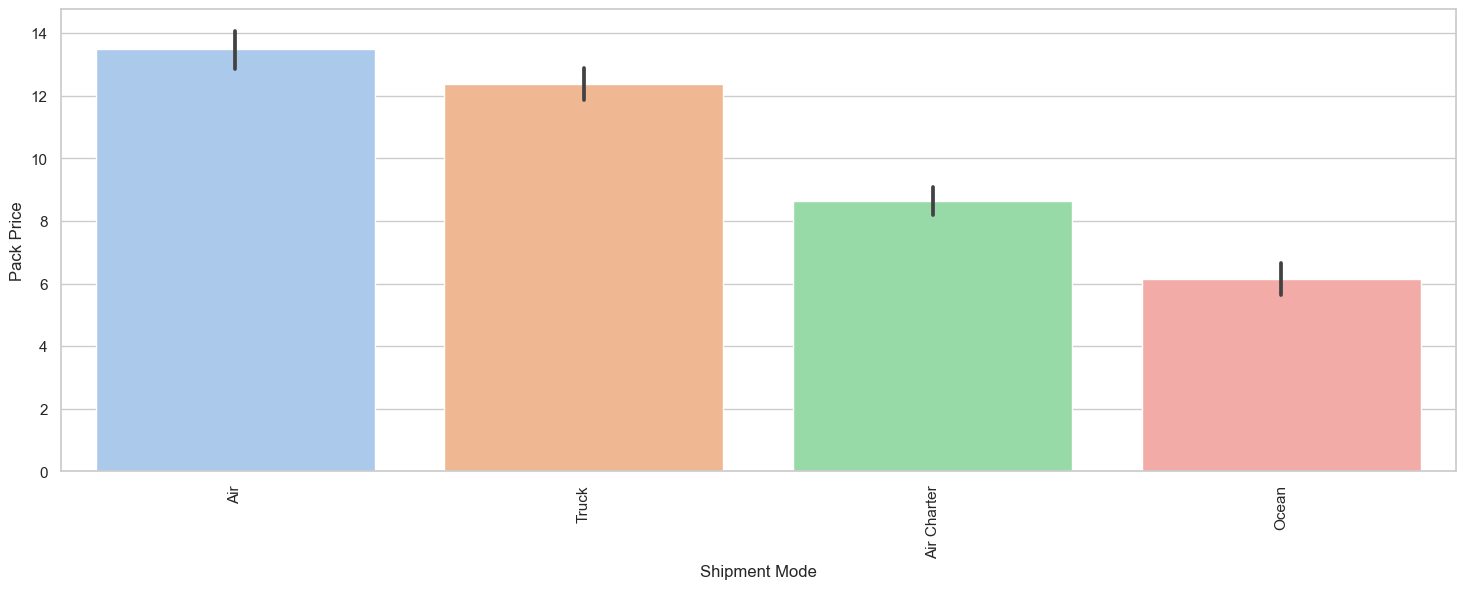

In [63]:
plt.subplots(figsize=(18,6))
plt.xticks(rotation = 90)
sns.barplot("Shipment Mode","Pack Price", data = dataset)
plt.show()

## Conclusion

* Top Country for Pack Price : Nigeria - 25,620.72
* Top Shipping Mode : Air
* The Max Air Shipment Mode is : 1000
* The Min Air Shipment is : 1
* The Mean Air Shipment is : 82.35
* Top Manufacturing Site : Aurobindo Unit III, India - 3172
* Top Air Manufacturing Site : Aurobindo Unit III, India - 1694